# Analysis of Social App Data
© 2021 Gabriel Orellana Diaz and Colin Conrad

In this file, we dig more deeply into the analysis that was presented in the published manuscript. If you are interested in diving into this analysis, [you can find a copy here](https://colinconrad.com/wp-content/uploads/2021/08/2021_ODiaz-Online_Communities_Dating_Apps.pdf). The citation is given below.

Diaz, G. O., & Conrad, C. (2021). Online Communities and Dating apps: The effects of social presence, trust, and Covid-19. In _Proceedings of the 2021 Americas Conference for Information Systems_. 

### License

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats

sns.set_theme() # set seaborn

data = pd.read_csv("data/dating_apps_survey_full.csv") 

### Specify the titles of the questionnaire items

In [2]:
processed = pd.DataFrame() # create a new data frame for processed data

# demographic questions
processed['age'] = data['Q1']
processed['gender'] = data['Q2']

# apps used
processed['apps_used'] = data['Q3']

# Q4 is missing because it was a dummy used for instructional purposes

# affordances
processed['apps_purposes'] = data['Q5']

# did these result in conversations or matches?
processed['apps_conversations'] = data['Q6']
processed['apps_match'] = data['Q7']

# questions about dating apps
processed['AS1'] = data['Q8']
processed['AS2'] = data['Q9']
processed['AS3'] = data['Q10']
processed['AT1'] = data['Q11']
processed['AT2'] = data['Q12']
processed['app_social'] = (data['Q8'] + data['Q9'] + data['Q10'])/3 # social presence measure
processed['app_trust'] = (data['Q11'] + data['Q12'])/2 # trust measure
processed['app_social_trust'] = (data['Q8'] + data['Q9'] + data['Q10'] + data['Q11'] + data['Q12'])/5 # social trust combined
processed['app_ease'] = data['Q13']
processed['app_hours'] = data['Q14']

# questions about in-person dates
processed['PS1'] = data['Q15']
processed['PS2'] = data['Q16']
processed['PS3'] = data['Q17']
processed['PT1'] = data['Q18']
processed['PT2'] = data['Q19']
processed['physical_social'] = (data['Q15'] + data['Q16'] + data['Q17'])/3
processed['physical_trust'] = (data['Q18'] + data['Q19'])/2
processed['physical_social_trust'] = (data['Q15'] + data['Q16'] + data['Q17'] + data['Q18'] + data['Q19'])/5
processed['physical_ease'] = data['Q20']
processed['physical_hours'] = data['Q21']

# questions about online communities
processed['OS1'] = data['Q22']
processed['OS2'] = data['Q23']
processed['OS3'] = data['Q24']
processed['OT1'] = data['Q25']
processed['OT2'] = data['Q26']
processed['online_social'] = (data['Q22'] + data['Q23'] + data['Q24'])/3
processed['online_trust'] = (data['Q25'] + data['Q26'])/2
processed['online_social_trust'] = (data['Q22'] + data['Q23'] + data['Q24'] + data['Q25'] + data['Q26'])/5
processed['online_ease'] = data['Q27']

# questions about covid
processed['covid_apps_more'] = data['Q28']
processed['covid_physical_more'] = data['Q29']
processed['covid_online_more'] = data['Q30']

In [3]:
processed = processed.dropna() # drop all participants who did not answer at lesat one question

processed.describe() # 194 responses remain

,age,gender,apps_conversations,apps_match,AS1,AS2,AS3,AT1,AT2,app_social,...,OS3,OT1,OT2,online_social,online_trust,online_social_trust,online_ease,covid_apps_more,covid_physical_more,covid_online_more
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2.469072,0.592784,2.618557,2.989691,4.664948,4.644330,4.149485,4.015464,4.144330,4.486254,...,4.520619,4.139175,4.257732,4.701031,4.198454,4.500000,3.314433,3.432990,2.355670,4.783505
std,1.003399,0.492587,1.151195,1.077272,1.405433,1.440457,1.528088,1.367562,1.414138,1.289917,...,1.377874,1.416487,1.441634,1.190042,1.364064,1.139084,1.792066,1.862681,1.679592,1.707811
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.666667,...,4.000000,3.000000,3.000000,4.000000,3.500000,3.850000,2.000000,2.000000,1.000000,4.000000
50%,2.000000,1.000000,2.000000,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.666667,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.600000,3.000000,3.000000,2.000000,5.000000
75%,3.000000,1.000000,3.000000,3.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.333333,...,5.000000,5.000000,5.000000,5.333333,5.000000,5.200000,5.000000,5.000000,3.000000,6.000000
max,5.000000,1.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Add the multi-select responses

In [4]:
# apps used
processed['apps_used'] = data['Q3']
processed['used_tinder'] = data['Q3_tinder']
processed['used_bumble'] = data['Q3_bumble']
processed['used_match'] = data['Q3_match']
processed['used_pof'] = data['Q3_pof']
processed['used_okcupid'] = data['Q3_okcupid']
processed['used_hinge'] = data['Q3_hinge']
processed['used_clover'] = data['Q3_clover']
processed['used_grindr'] = data['Q3_grindr']
processed['used_coffeebean'] = data['Q3_coffeebean']
processed['used_meetme'] = data['Q3_meetme']
processed['used_eharmony'] = data['Q3_eharmony']
processed['used_jda'] = data['Q3_jda']
processed['used_aff'] = data['Q3_aff']
processed['used_facebook_dating'] = data['Q3_facebook_dating']
processed['used_none'] = data['Q3_never_used']

# affordances
processed['apps_purposes'] = data['Q5']
processed['affordance_short_term'] = data['Q5_short_term']
processed['affordance_long_term'] = data['Q5_long_term']
processed['affordance_friendship'] = data['Q5_friendship']
processed['affordance_validation'] = data['Q5_validation']
processed['affordance_entertainment'] = data['Q5_entertainment']
processed['affordance_other'] = data['Q5_other']
processed['affordance_never_used'] = data['Q5_never_used']

In [5]:
processed.head()

,age,gender,apps_used,apps_purposes,apps_conversations,apps_match,AS1,AS2,AS3,AT1,...,used_aff,used_facebook_dating,used_none,affordance_short_term,affordance_long_term,affordance_friendship,affordance_validation,affordance_entertainment,affordance_other,affordance_never_used
0,3,1,"Tinder,Plenty of Fish",Finding short-term romantic or sexual relation...,2,2,5.0,5,2.0,3,...,0,0,0,1,0,0,0,0,0,0
1,2,1,Plenty of Fish,Finding long-term romantic or sexual relations...,3,3,6.0,7,7.0,6,...,0,0,0,0,1,0,0,0,0,0
2,2,0,"Tinder,Bumble,Match,Plenty of Fish,OKCupid,Grindr",Finding short-term romantic or sexual relation...,2,2,6.0,6,5.0,5,...,0,0,0,1,1,0,0,0,0,0
3,3,1,Tinder,Finding short-term romantic or sexual relation...,2,3,6.0,5,5.0,4,...,0,0,0,1,1,0,0,1,0,0
4,2,1,"Tinder,Bumble,OKCupid",Finding short-term romantic or sexual relation...,3,2,3.0,3,3.0,5,...,0,0,0,1,1,1,0,0,0,0


### Factor analysis
Factor analysis is a technique for discovering whether items accurately reflect latent variables. The technique is described well in an IS context by Gefen (2000). We want to find the best way to analyze this multi-item instrument.

We will start by conducting Kaiser-Meyer-Olkin tests to determine whether the data are appropriate for factor analysis. They all exceed the threshold of 0.6, which is good.

In [6]:
from factor_analyzer import FactorAnalyzer # this is a tool for doing factor analysis

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo

sub = processed[['AS1', 'AS2', 'AS3', 'AT1', 'AT2', 'app_ease']]
kmo_all,kmo_model=calculate_kmo(sub)

kmo_model

0.7755141059515427

In [8]:
fa = FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)
fa.fit(sub)
fa.loadings_

array([[ 0.76472948,  0.39066154, -0.05991362],
       [ 0.65127483,  0.25366251,  0.00553988],
       [ 0.84884792,  0.33970503, -0.00418231],
       [ 0.78383102, -0.45702363, -0.22205377],
       [ 0.85168913, -0.48444838,  0.17189561],
       [ 0.51068043,  0.03625829,  0.14375111]])

In [9]:
sub = processed[['PS1', 'PS2','PS3', 'PT1', 'PT2', 'physical_ease']]
kmo_all,kmo_model=calculate_kmo(sub)

kmo_model

0.6913716343410926

In [10]:
sub.corr()

,PS1,PS2,PS3,PT1,PT2,physical_ease
PS1,1.000000,0.363989,0.653147,0.289067,0.243046,0.104017
PS2,0.363989,1.000000,0.382708,0.311032,0.233962,0.116929
PS3,0.653147,0.382708,1.000000,0.423966,0.395626,0.179319
PT1,0.289067,0.311032,0.423966,1.000000,0.864921,0.436759
PT2,0.243046,0.233962,0.395626,0.864921,1.000000,0.457776
physical_ease,0.104017,0.116929,0.179319,0.436759,0.457776,1.000000


In [11]:
reg1 = sm.OLS(endog=processed['physical_ease'], exog=processed[['PS1', 'PS2', 'PS3', 'PT1', 'PT2']], \
    missing='drop')
results = reg1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          physical_ease   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              357.1
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    3.06e-94
Time:                        12:48:40   Log-Likelihood:                         -346.34
No. Observations:                 194   AIC:                                      702.7
Df Residuals:                     189   BIC:                                      719.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
fa = FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)
fa.fit(sub)
fa.loadings_

array([[ 0.55820471,  0.57102252, -0.0448114 ],
       [ 0.42185453,  0.24180422,  0.2139559 ],
       [ 0.68148737,  0.47080271, -0.0869304 ],
       [ 0.86577094, -0.33058417,  0.12029636],
       [ 0.85527686, -0.41967677, -0.11862901],
       [ 0.41954422, -0.2298918 , -0.02071487]])

In [13]:
sub = processed[['OS1', 'OS2', 'OS3', 'OT1', 'OT2', 'online_ease']]
kmo_all,kmo_model=calculate_kmo(sub)

kmo_model

0.8170518768883112

In [14]:
fa = FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)
fa.fit(sub)
fa.loadings_

array([[ 0.78193846, -0.21599378,  0.03035906],
       [ 0.78884211, -0.34057493,  0.30302523],
       [ 0.90945485, -0.26172753, -0.31568071],
       [ 0.76531381,  0.45607909, -0.03119061],
       [ 0.82948235,  0.41728386,  0.09348305],
       [ 0.49421445, -0.03963898, -0.05939237]])

### Demographics

<AxesSubplot:>

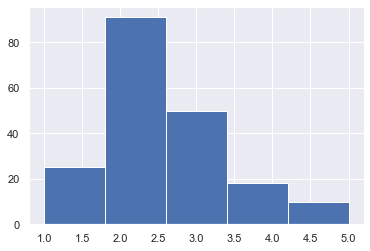

In [15]:
processed['age'].hist(bins=5)

In [16]:
count = 0
for c in processed['gender']:
    if c == 1:
        count+=1
count

115

<AxesSubplot:>

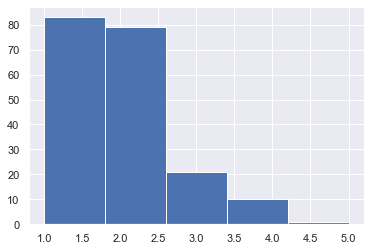

In [17]:
processed['app_hours'].hist(bins=5)

## Digging into Gabriel Observations

Here are some functions to help us with bar graphs.

In [18]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def convertDataFrame(name, app, physical, online):
    d = {
        "Dating style": ["Dating Apps", "Physical Group", "Online Communities"],
        name: [app[0], physical[0], online[0]],
        "CI Low": [app[1], physical[1], online[1]],
        "CI High": [app[2], physical[2], online[2]]
    }
    return(d)

def generateGraph(measure, means):
    g = sns.catplot(
        data=means, kind="bar",
        x=measure, y="Dating style",
        ci=None, height=5, aspect=2
    )

    xerr = [means[measure] - means['CI Low'], means['CI High'] - means[measure]]
    plt.errorbar(x=means[measure], y=[0,1,2], xerr=xerr, fmt='none', c='black')

    g.despine(left=True)
    g.set_axis_labels(measure + "(mean)", "Dating Style")
    #g.legend.set_title("Awesome")


## Test for social presence
Physical groups see more social presence. The others are not significantly different.

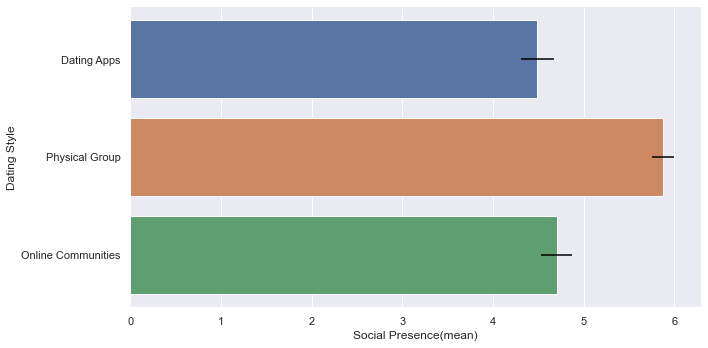

In [19]:
app_social = mean_confidence_interval(processed['app_social'])
physical_social = mean_confidence_interval(processed['physical_social'])
online_social = mean_confidence_interval(processed['online_social'])

means = pd.DataFrame(data=convertDataFrame("Social Presence", app_social, physical_social, online_social))
means

generateGraph("Social Presence", means)

### Test for trust
We see the same thing for trust. This is why we should understand the constructs as one.

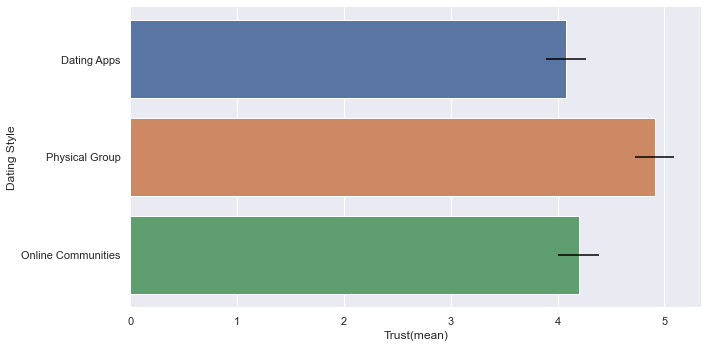

In [20]:
app_social = mean_confidence_interval(processed['app_trust'])
physical_social = mean_confidence_interval(processed['physical_trust'])
online_social = mean_confidence_interval(processed['online_trust'])

means = pd.DataFrame(data=convertDataFrame("Trust", app_social, physical_social, online_social))
means

generateGraph("Trust", means)

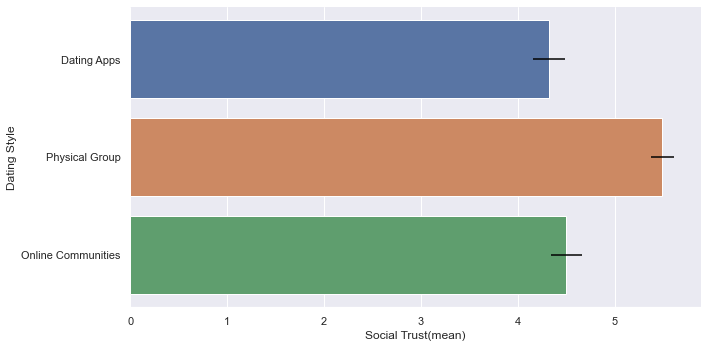

In [21]:
app_social = mean_confidence_interval(processed['app_social_trust'])
physical_social = mean_confidence_interval(processed['physical_social_trust'])
online_social = mean_confidence_interval(processed['online_social_trust'])

means = pd.DataFrame(data=convertDataFrame("Social Trust", app_social, physical_social, online_social))
means

generateGraph("Social Trust", means)

## Apps Used

In [22]:
d = {
        "Dating Apps Used": [
            "Tinder", 
            "Bumble", 
            "Match",
            "Plenty of Fish",
            "OK Cupid",
            "Hinge",
            "Clover",
            "Grindr",
            "Coffee & Bean",
            "MeetMe",
            "eHarmony",
            "JDA",
            "AFF",
            "Facebook Dating",
            "Never Used"
        ],
        "Number Reported": [
            len(processed[processed["used_tinder"] == 1]),
            len(processed[processed["used_bumble"] == 1]),
            len(processed[processed["used_match"] == 1]),
            len(processed[processed["used_pof"] == 1]),
            len(processed[processed["used_okcupid"] == 1]),
            len(processed[processed["used_hinge"] == 1]),
            len(processed[processed["used_clover"] == 1]),
            len(processed[processed["used_grindr"] == 1]),
            len(processed[processed["used_coffeebean"] == 1]),
            len(processed[processed["used_meetme"] == 1]),
            len(processed[processed["used_eharmony"] == 1]),
            len(processed[processed["used_jda"] == 1]),
            len(processed[processed["used_aff"] == 1]),
            len(processed[processed["used_facebook_dating"] == 1]),
            len(processed[processed["used_none"] == 1])
        ]
    }

counts = pd.DataFrame(data=d)
counts

,Dating Apps Used,Number Reported
0,Tinder,115
1,Bumble,49
2,Match,64
3,Plenty of Fish,64
4,OK Cupid,72
5,Hinge,16
6,Clover,2
7,Grindr,24
8,Coffee & Bean,15
9,MeetMe,28


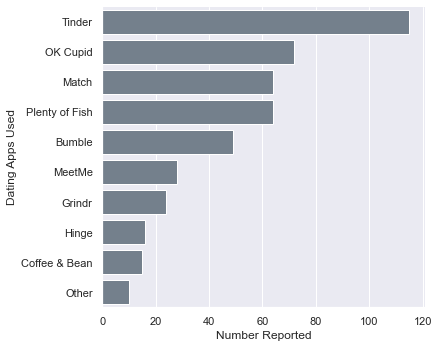

In [23]:
clean_counts = counts.sort_values(by="Number Reported", ascending=False) # let's remove those that are fewer than "Never used"
clean_counts = clean_counts[clean_counts["Number Reported"] > 10]
clean_counts = clean_counts.append({'Dating Apps Used': 'Other', 'Number Reported': 10}, ignore_index=True) # append other

g = sns.catplot(
        data=clean_counts, kind="bar",
        x="Number Reported", y="Dating Apps Used",
        height=5, aspect=1.25, color="slategray"
    )

# Research Question Testing

### RQ 1 - Do people perceive it as more difficult to find dates using dating apps than through groups?
- People think it is generally more difficult to find people in online communities than in person or through dating apps
- Dating apps are not significantly perceived to be easier than in-person

In [24]:
print(processed['app_ease'].mean())
print(processed['physical_ease'].mean())
print(processed['online_ease'].mean())

stats.f_oneway(processed['app_ease'],processed['physical_ease'],processed['online_ease'])

4.252577319587629
4.376288659793815
3.314432989690722


F_onewayResult(statistic=23.378009704876295, pvalue=1.7226073198163805e-10)

### Calculate mean and CI

In [25]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [26]:
app_ease = mean_confidence_interval(processed['app_ease'])
physical_ease = mean_confidence_interval(processed['physical_ease'])
online_ease = mean_confidence_interval(processed['online_ease'])

### Visualize

In [27]:
d = {
    "Dating style": ["Dating Apps", "Physical Group", "Online Communities"],
    "Ease of finding dates": [app_ease[0], physical_ease[0], online_ease[0]],
    "CI Low": [app_ease[1], physical_ease[1], online_ease[1]],
    "CI High": [app_ease[2], physical_ease[2], online_ease[2]]
}

means = pd.DataFrame(data=d)
means

,Dating style,Ease of finding dates,CI Low,CI High
0,Dating Apps,4.252577,4.024970,4.480185
1,Physical Group,4.376289,4.148018,4.604559
2,Online Communities,3.314433,3.060667,3.568199


### 95% confidence intervals

In [28]:
sns.set_palette("colorblind",10)

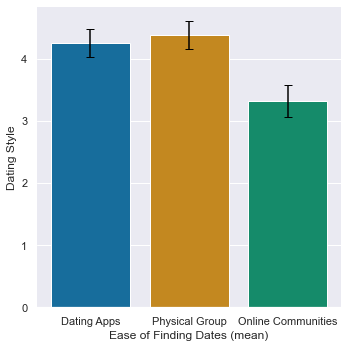

In [29]:
g = sns.catplot(
    data=means, kind="bar",
    x="Dating style", y="Ease of finding dates",
    ci=None, height=5, aspect=1,
)

yerr = [means["Ease of finding dates"] - means['CI Low'], means['CI High'] - means["Ease of finding dates"]]
plt.errorbar(y=means["Ease of finding dates"], x=[0,1,2], yerr=yerr, fmt='none', c='black', capsize=4)

g.despine(left=True)
g.set_axis_labels("Ease of Finding Dates (mean)", "Dating Style")
#g.legend.set_title("Awesome")

### RQ2 - Do perceived social presence and perceived trustworthiness of peers influence ease of finding dates when using dating apps or meeting through virtual communities?
- We see that trust and social are strong predictors of ease of finding dates across the board
- Trust has a much stronger coefficient in person vs social

In [30]:
processed.head()

,age,gender,apps_used,apps_purposes,apps_conversations,apps_match,AS1,AS2,AS3,AT1,...,used_aff,used_facebook_dating,used_none,affordance_short_term,affordance_long_term,affordance_friendship,affordance_validation,affordance_entertainment,affordance_other,affordance_never_used
0,3,1,"Tinder,Plenty of Fish",Finding short-term romantic or sexual relation...,2,2,5.0,5,2.0,3,...,0,0,0,1,0,0,0,0,0,0
1,2,1,Plenty of Fish,Finding long-term romantic or sexual relations...,3,3,6.0,7,7.0,6,...,0,0,0,0,1,0,0,0,0,0
2,2,0,"Tinder,Bumble,Match,Plenty of Fish,OKCupid,Grindr",Finding short-term romantic or sexual relation...,2,2,6.0,6,5.0,5,...,0,0,0,1,1,0,0,0,0,0
3,3,1,Tinder,Finding short-term romantic or sexual relation...,2,3,6.0,5,5.0,4,...,0,0,0,1,1,0,0,1,0,0
4,2,1,"Tinder,Bumble,OKCupid",Finding short-term romantic or sexual relation...,3,2,3.0,3,3.0,5,...,0,0,0,1,1,1,0,0,0,0


### There is a strong fit for dating apps

In [31]:
colors = [
    [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745)], # colorblind blue
    [(0.8705882352941177, 0.5607843137254902, 0.0196078431372549)], # colorblind orange
    [(0.00784313725490196, 0.6196078431372549, 0.45098039215686275)] # colorblind green
]

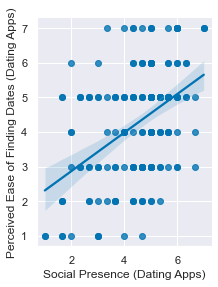

In [32]:
sns.set_palette(colors[0],1)
g = sns.lmplot(data=processed, x="app_social", y="app_ease", height=4, aspect=0.8)
g.set_axis_labels("Social Presence (Dating Apps)", "Perceived Ease of Finding Dates (Dating Apps)")

In [33]:
reg1 = sm.OLS(endog=processed['app_ease'], exog=processed[['app_social']], \
    missing='drop')
results = reg1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               app_ease   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              1547.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    4.18e-94
Time:                        12:48:43   Log-Likelihood:                         -355.67
No. Observations:                 194   AIC:                                      713.3
Df Residuals:                     193   BIC:                                      716.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

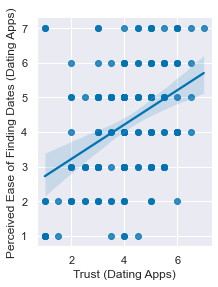

In [34]:
g = sns.lmplot(data=processed, x="app_trust", y="app_ease", height=4, aspect=0.8)
g.set_axis_labels("Trust (Dating Apps)", "Perceived Ease of Finding Dates (Dating Apps)")

In [35]:
reg1 = sm.OLS(endog=processed['app_ease'], exog=processed[['app_trust']], \
    missing='drop')
results = reg1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               app_ease   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1334.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    1.25e-88
Time:                        12:48:44   Log-Likelihood:                         -368.34
No. Observations:                 194   AIC:                                      738.7
Df Residuals:                     193   BIC:                                      741.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### This is also true for physical communities

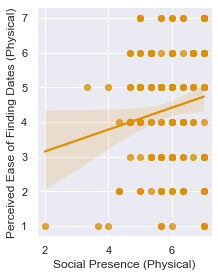

In [36]:
sns.set_palette(colors[1],1)
g = sns.lmplot(data=processed, x="physical_social", y="physical_ease", height=4, aspect=0.8)
g.set_axis_labels("Social Presence (Physical)", "Perceived Ease of Finding Dates (Physical)")

In [37]:
reg2 = sm.OLS(endog=processed['physical_ease'], exog=processed['physical_social'], \
    missing='drop')
results = reg2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          physical_ease   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              1395.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    2.84e-90
Time:                        12:48:44   Log-Likelihood:                         -369.49
No. Observations:                 194   AIC:                                      741.0
Df Residuals:                     193   BIC:                                      744.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

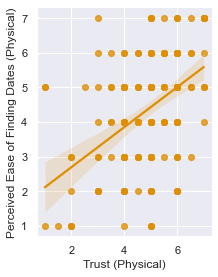

In [38]:
g = sns.lmplot(data=processed, x="physical_trust", y="physical_ease", height=4, aspect=0.8)
g.set_axis_labels("Trust (Physical)", "Perceived Ease of Finding Dates (Physical)")

In [39]:
reg2 = sm.OLS(endog=processed['physical_ease'], exog=processed['physical_trust'], \
    missing='drop')
results = reg2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          physical_ease   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              1730.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    2.77e-98
Time:                        12:48:45   Log-Likelihood:                         -350.96
No. Observations:                 194   AIC:                                      703.9
Df Residuals:                     193   BIC:                                      707.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Though weaker, it is also the case for online communities

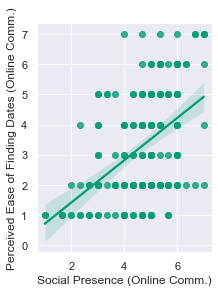

In [40]:
sns.set_palette(colors[2],1)
g = sns.lmplot(data=processed, x="online_social", y="online_ease", height=4, aspect=0.8)
g.set_axis_labels("Social Presence (Online Comm.)", "Perceived Ease of Finding Dates (Online Comm.)")

In [41]:
reg3 = sm.OLS(endog=processed['online_ease'], exog=processed['online_social'], \
    missing='drop')
results = reg3.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            online_ease   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              900.5
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    1.29e-74
Time:                        12:48:45   Log-Likelihood:                         -364.27
No. Observations:                 194   AIC:                                      730.5
Df Residuals:                     193   BIC:                                      733.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

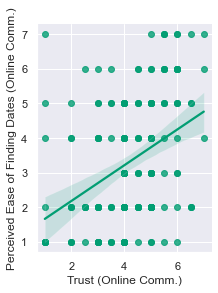

In [42]:
g = sns.lmplot(data=processed, x="online_trust", y="online_ease", height=4, aspect=0.8)
g.set_axis_labels("Trust (Online Comm.)", "Perceived Ease of Finding Dates (Online Comm.)")

In [43]:
reg3 = sm.OLS(endog=processed['online_ease'], exog=processed['online_trust'], \
    missing='drop')
results = reg3.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            online_ease   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              775.2
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    1.64e-69
Time:                        12:48:46   Log-Likelihood:                         -376.06
No. Observations:                 194   AIC:                                      754.1
Df Residuals:                     193   BIC:                                      757.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Are they correlated?

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

## Dating apps

In [45]:
foo = processed[['app_social', 'app_trust']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

      feature        VIF
0  app_social  12.906301
1   app_trust  12.906301


In [46]:
foo = processed[['app_social', 'app_ease']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

      feature       VIF
0  app_social  9.016843
1    app_ease  9.016843


In [47]:
foo = processed[['app_trust', 'app_ease']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

     feature       VIF
0  app_trust  7.913313
1   app_ease  7.913313


## Physical

In [48]:
foo = processed[['physical_trust', 'physical_social']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

           feature        VIF
0   physical_trust  18.227093
1  physical_social  18.227093


In [49]:
foo = processed[['physical_social', 'physical_ease']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

           feature       VIF
0  physical_social  8.229417
1    physical_ease  8.229417


In [50]:
foo = processed[['physical_trust', 'physical_ease']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

          feature       VIF
0  physical_trust  9.961527
1   physical_ease  9.961527


## Online communities

In [51]:
foo = processed[['online_social', 'online_trust']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

         feature        VIF
0  online_social  16.814219
1   online_trust  16.814219


In [52]:
foo = processed[['online_social', 'online_ease']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

         feature      VIF
0  online_social  5.66568
1    online_ease  5.66568


In [53]:
foo = processed[['online_trust', 'online_ease']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

        feature       VIF
0  online_trust  5.016775
1   online_ease  5.016775


### RQ3 - Does perceived ease of finding dates influence increased reported use?
- Strong predictions on all three

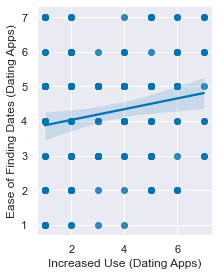

In [54]:
sns.set_palette(colors[0],1)
g = sns.lmplot(data=processed, x="covid_apps_more", y="app_ease", height=4, aspect=0.8)
g.set_axis_labels("Increased Use (Dating Apps)", "Ease of Finding Dates (Dating Apps)")

In [55]:
reg4 = sm.OLS(endog=processed['covid_apps_more'], exog=processed[['app_ease']], \
    missing='drop')
results = reg4.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        covid_apps_more   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              515.9
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    1.99e-56
Time:                        12:48:46   Log-Likelihood:                         -413.27
No. Observations:                 194   AIC:                                      828.5
Df Residuals:                     193   BIC:                                      831.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
foo = processed[['app_ease', 'covid_apps_more']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

           feature       VIF
0         app_ease  3.673233
1  covid_apps_more  3.673233


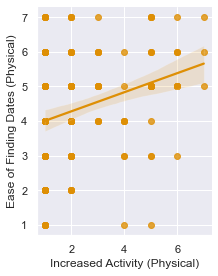

In [57]:
sns.set_palette(colors[1],1)
g = sns.lmplot(data=processed, x="covid_physical_more", y="physical_ease", height=4, aspect=0.8)
g.set_axis_labels("Increased Activity (Physical)", "Ease of Finding Dates (Physical)")

In [58]:
foo = processed[['physical_ease', 'covid_physical_more']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

               feature       VIF
0        physical_ease  3.088551
1  covid_physical_more  3.088551


In [59]:
reg5 = sm.OLS(endog=processed['covid_physical_more'], exog=processed[['physical_ease']], \
    missing='drop')
results = reg5.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     covid_physical_more   R-squared (uncentered):                   0.676
Model:                             OLS   Adj. R-squared (uncentered):              0.675
Method:                  Least Squares   F-statistic:                              403.1
Date:                 Wed, 06 Jul 2022   Prob (F-statistic):                    3.81e-49
Time:                         12:48:47   Log-Likelihood:                         -371.81
No. Observations:                  194   AIC:                                      745.6
Df Residuals:                      193   BIC:                                      748.9
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

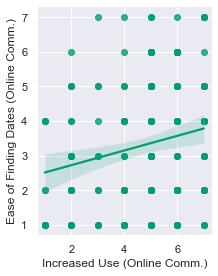

In [60]:
sns.set_palette(colors[2],1)
g = sns.lmplot(data=processed, x="covid_online_more", y="online_ease", height=4, aspect=0.8)
g.set_axis_labels("Increased Use (Online Comm.)", "Ease of Finding Dates (Online Comm.)")

In [61]:
reg6 = sm.OLS(endog=processed['covid_online_more'], exog=processed[['online_ease']], \
    missing='drop')
results = reg6.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      covid_online_more   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              554.6
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                    1.18e-58
Time:                        12:48:47   Log-Likelihood:                         -459.15
No. Observations:                 194   AIC:                                      920.3
Df Residuals:                     193   BIC:                                      923.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [62]:
foo = processed[['online_ease', 'covid_online_more']]

vif_data = pd.DataFrame() 
vif_data["feature"] = foo.columns 

vif_data["VIF"] = [variance_inflation_factor(foo.values, i) 
                          for i in range(len(foo.columns))] 

print(vif_data)

             feature       VIF
0        online_ease  3.873495
1  covid_online_more  3.873495


### RQ4 - To what degree, if any, has COVID-19 affected dating app usage and social interaction in groups?
- People are more likely to use dating apps more than meet in person more
- People are more likely to use online communities more than use dating apps more

In [63]:
print(processed['covid_apps_more'].mean())
print(processed['covid_physical_more'].mean())
print(processed['covid_online_more'].mean())

3.4329896907216493
2.3556701030927836
4.783505154639175


In [64]:
stats.f_oneway(processed['covid_apps_more'],processed['covid_physical_more'],processed['covid_online_more'])

F_onewayResult(statistic=93.54092830186492, pvalue=6.277409851153611e-36)

In [65]:
stats.ttest_ind(processed['covid_apps_more'],processed['covid_physical_more'])

Ttest_indResult(statistic=5.982725249025166, pvalue=5.01019577022723e-09)

In [66]:
stats.ttest_ind(processed['covid_apps_more'],processed['covid_online_more'])

Ttest_indResult(statistic=-7.443535428778501, pvalue=6.442540305487545e-13)

### Confidence Intervals

In [67]:
covid_apps_more = mean_confidence_interval(processed['covid_apps_more'])
covid_physical_more = mean_confidence_interval(processed['covid_physical_more'])
covid_online_more = mean_confidence_interval(processed['covid_online_more'])

In [68]:
d = {
    "Increased Use During Covid": ["Dating Apps", "Physical Group", "Online Communities"],
    "Mean Values": [covid_apps_more[0], covid_physical_more[0], covid_online_more[0]],
    "CI Low": [covid_apps_more[1], covid_physical_more[1], covid_online_more[1]],
    "CI High": [covid_apps_more[2], covid_physical_more[2], covid_online_more[2]]
}

means = pd.DataFrame(data=d)
means

,Increased Use During Covid,Mean Values,CI Low,CI High
0,Dating Apps,3.432990,3.169224,3.696755
1,Physical Group,2.355670,2.117831,2.593509
2,Online Communities,4.783505,4.541670,5.025340


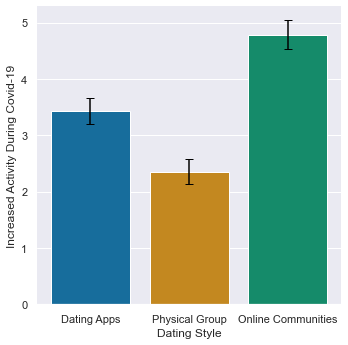

In [69]:
sns.set_palette("colorblind",10)

g = sns.catplot(
    data=means, kind="bar",
    x="Increased Use During Covid", y="Mean Values", 
    ci=None, height=5, aspect=1
)

xerr = [means["Mean Values"] - means['CI Low'], means['CI High'] - means["Mean Values"]]
plt.errorbar(y=means["Mean Values"], x=[0,1,2], yerr=yerr, fmt='none', c='black', capsize=4)

g.despine(left=True)
g.set_axis_labels("Dating Style", "Increased Activity During Covid-19")
#g.legend.set_title("Awesome")